In [3]:
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
from google.colab import files

uploaded = files.upload()


Saving .DS_Store to .DS_Store (1)
Saving bank-full.csv to bank-full (1).csv


In [39]:
import os
print(os.listdir())


['.config', 'bank-full (1).csv', '.DS_Store (1)', '.DS_Store', 'bank-full.csv', 'sample_data']


In [40]:
file_path = 'bank-full.csv'
data = pd.read_csv(file_path, delimiter=';')
print("Dataset loaded")

Dataset loaded


In [9]:
# Inspectation of dataset
print("\nInspecting the dataset...")
print(data.info())  #overview of data types
print("\nChecking for missing values...")
print(data.isnull().sum())  # Check for missing values


Inspecting the dataset...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None

Checking for missing values...
age          0
job          0
marit

In [43]:
from sklearn.preprocessing import LabelEncoder

#  Handling categorical variables using LabelEncoder
print("\nHandling categorical variables...")

# Identify categorical features in the dataset
categorical_cols = data.select_dtypes(include=['object']).columns

# Create a LabelEncoder object
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

print("Categorical variables encoded.")
print("\nFirst 5 rows after encoding:")
print(data.head())




Handling categorical variables...
Categorical variables encoded.

First 5 rows after encoding:
   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0    5      8       261         1     -1         0         3  0  
1    5      8       151         1     -1         0         3  0  
2    5      8        76         1     -1         0         3  0  
3    5      8        92         1     -1         0         3  0  
4    5      8       198         1     -1         0         3  0  


In [20]:
X = data.drop(columns=["y"])  # Features
y = data["y"]  # Target variable

print("Features and target variable separated.")


Features and target variable separated.


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #Split the dataset into training and testing sets

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")


Training set size: 31647
Testing set size: 13564


In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


print("standardized features")



standardized features


In [23]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

print("Trained SVM model")

Trained SVM model


In [24]:
y_pred = svm_model.predict(X_test)

print("Predictions completed.")

Predictions completed.


In [25]:
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("\nClassification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(confusion_mat)
print(f"\nAccuracy Score: {accuracy:.2f}")



Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11966
           1       0.65      0.27      0.38      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.63      0.66     13564
weighted avg       0.88      0.90      0.88     13564


Confusion Matrix:
[[11736   230]
 [ 1166   432]]

Accuracy Score: 0.90


In [54]:
#Make Predictions for a New Customer
new_customer_data = {
    'age': [45],  # Changed age
    'job': [4],  # job encoded as 4 (for example, 'blue-collar')
    'marital': [1],  # marital encoded as 1 (single)
    'education': [1],  # education encoded as 1 (secondary)
    'default': [1],  # default encoded as 1 (yes)
    'balance': [1200],  # Changed balance
    'housing': [1],  # housing encoded as 1 (yes)
    'loan': [1],  # loan encoded as 1 (yes)
    'contact': [2],  # contact encoded as 2 (telephone)
    'day': [15],  # Day of the month the last contact was made
    'month': [9],  # month encoded as 9 (September)
    'duration': [350],  # duration of last contact
    'campaign': [3],  # number of contacts performed during this campaign
    'pdays': [200],  # number of days since the customer was last contacted
    'previous': [2],  # number of contacts performed before this campaign
    'poutcome': [1]  # outcome of the previous marketing campaign
}

#Convert to DataFrame
import pandas as pd
new_customer_df = pd.DataFrame(new_customer_data)

#Encode categorical variables using the same label encoders from the training data
for col, encoder in label_encoders.items():
    new_customer_df[col] = encoder.transform(new_customer_df[col])

#Scale the new customer's data using the same scaler
new_customer_scaled = scaler.transform(new_customer_df.values)

#Predict using the trained model
prediction = svm_model.predict(new_customer_scaled)

# Interpret the result
if prediction[0] == 1:
    print("The customer is going to subscribe to a term deposit.")
else:
    print("The customer isn't going to subscribe to a term deposit.")



The customer isn't going to subscribe to a term deposit.


In [59]:
#Make Predictions for a New Customer
new_customer_data = {
    'age': [45],  # Customer's age
    'job': [4],  # Job encoded as 4 (e.g., 'blue-collar')
    'marital': [1],  # Marital status encoded as 1 (e.g., 'single')
    'education': [1],  # Education encoded as 1 (e.g., 'secondary')
    'default': [1],  # Default encoded as 1 (e.g., 'yes')
    'balance': [1200],  # Customer's balance
    'housing': [1],  # Housing encoded as 1 (e.g., 'yes')
    'loan': [1],  # Loan encoded as 1 (e.g., 'yes')
    'contact': [2],  # Contact method encoded as 2 (e.g., 'telephone')
    'day': [15],  # Day of the month
    'month': [9],  # Month encoded as 9 (e.g., 'September')
    'duration': [350],  # Duration of the last contact
    'campaign': [3],  # Number of contacts performed during this campaign
    'pdays': [200],  # Number of days since last contact
    'previous': [2],  # Number of contacts performed before this campaign
    'poutcome': [1]  # Outcome of the previous marketing campaign
}

#Convert the data into DataFrame
new_data_df = pd.DataFrame(new_customer_data)


#Standardize the input data
scaler = StandardScaler()
new_data_scaled = scaler.fit_transform(new_data_df)

#Predict using the trained model
prediction = svm_model.predict(new_data_scaled)

#Interpret the result
if prediction[0] == 1:
    print("The customer is going to subscribe to a term deposit.")
else:
    print("The customer is not going to subscribe to a term deposit.")




The customer is not going to subscribe to a term deposit.


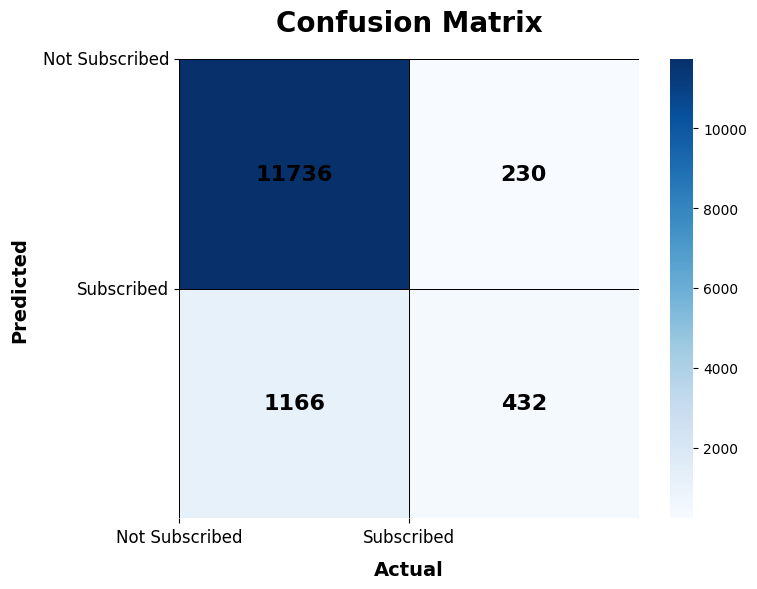

In [55]:
# Visualize the confusion matrix
plt.figure(figsize=(8,6))


sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=True,
            annot_kws={"size": 16, "weight": "bold", "color": "black"},
            linewidths=0.5, linecolor='black', square=True)

# title and axis labels alignment
plt.title("Confusion Matrix", fontsize=20, fontweight='bold', loc='center', pad=20)
plt.xlabel("Actual", fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel("Predicted", fontsize=14, fontweight='bold', labelpad=10)

# Set x and y tick labels s
plt.xticks(ticks=[0, 1], labels=['Not Subscribed', 'Subscribed'], fontsize=12, rotation=0, ha='center')
plt.yticks(ticks=[0, 1], labels=['Not Subscribed', 'Subscribed'], fontsize=12, rotation=0, va='center')

#layout for proper label alignment
plt.tight_layout()

plt.show()
